In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename

In [ ]:
!pip install kornia
!pip install kornia-rs
!pip install kornia_moons
!pip install opencv-python --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /root/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt
100%|██████████| 44.2M/44.2M [00:01<00:00, 25.4MB/s]


Elapsed Time: 57.1605 seconds


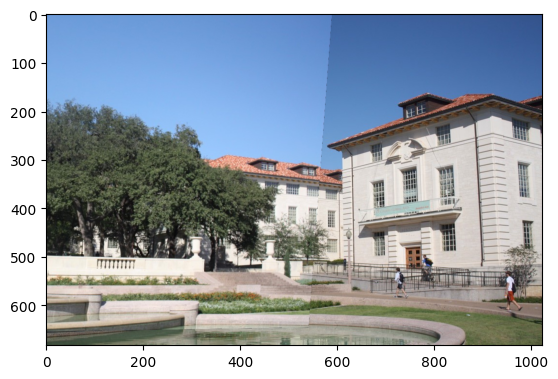

Ukuran Gambar: [(683, 1024), (683, 1024)]
Ukuran File Hasil: 230.00 KB


In [ ]:
import io
import requests
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia.contrib import ImageStitcher
import time
import os

def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1].split("?")[0] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())
    return filename

# Unduh gambar
download_image("http://www.ic.unicamp.br/~helio/imagens_registro/foto1B.jpg")
download_image("http://www.ic.unicamp.br/~helio/imagens_registro/foto1A.jpg")

# Muat dan olah gambar sebagai RGB
def load_images(fnames):
    return [cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0 for fn in fnames]

imgs = load_images(["foto1A.jpg", "foto1B.jpg"])

# Ukuran gambar
image_sizes = [img.shape[:2] for img in imgs]

# Stitching gambar
start_time = time.time()
IS = ImageStitcher(KF.LoFTR(pretrained="outdoor"), estimator="ransac")
imgs_tensors = [torch.from_numpy(img.transpose(2, 0, 1)).unsqueeze(0) for img in imgs]
with torch.no_grad():
    out = IS(*imgs_tensors)
elapsed_time = time.time() - start_time

# Waktu komputasi
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

# Tampilkan gambar hasil stitching
plt.imshow(K.tensor_to_image(out))
plt.show()

# Simpan gambar hasil ke dalam file
output_filename = "stitched_image.jpg"
cv2.imwrite(output_filename, K.tensor_to_image(out)[:, :, ::-1] * 255)  # Convert back to BGR for OpenCV

# Dapatkan ukuran file dalam byte
file_size = os.path.getsize(output_filename)

# Konversi ukuran ke KB atau MB
if file_size < 1024:
    size_str = f"{file_size} B"
elif file_size < 1024 * 1024:
    size_str = f"{file_size / 1024:.2f} KB"
else:
    size_str = f"{file_size / (1024 * 1024):.2f} MB"

# Output tambahan
print(f"Ukuran Gambar: {image_sizes}")
print(f"Ukuran File Hasil: {size_str}")


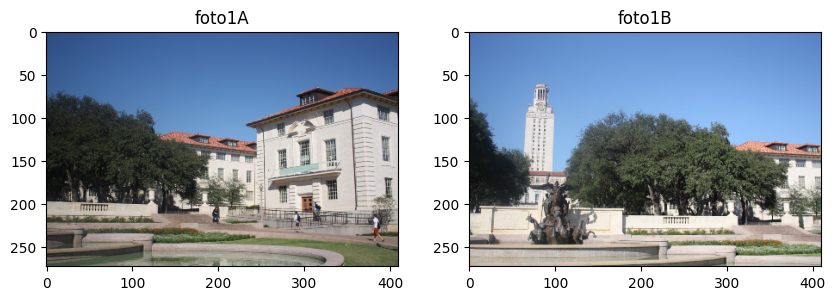

Your Panorama is ready!!!


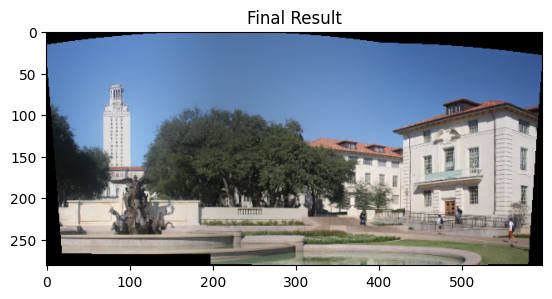

Elapsed Time: 0.1797 seconds
Image Sizes: [(273, 410), (273, 410)]
Stitched Image File Size: 61.11 KB


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import time
import os

image_paths = ['foto1A.jpg', 'foto1B.jpg']

# Initialized a list of images
imgs = []

for i in range(len(image_paths)):
    imgs.append(cv2.imread(image_paths[i]))
    imgs[i] = cv2.resize(imgs[i], (0, 0), fx=0.4, fy=0.4)

# Showing the original pictures using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
plt.title('foto1A')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgs[1], cv2.COLOR_BGR2RGB))
plt.title('foto1B')

plt.show()

# Perform stitching with time measurement
start_time = time.time()
stitcher = cv2.Stitcher.create()
status, panorama = stitcher.stitch(imgs)
elapsed_time = time.time() - start_time

if status != cv2.Stitcher_OK:
    # Checking if the stitching procedure is successful
    # .stitch() function returns a true value if stitching is done successfully
    print("Stitching ain't successful")
else:
    print('Your Panorama is ready!!!')

    # Final output using matplotlib
    plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
    plt.title('Final Result')
    plt.show()

    # Image sizes
    image_sizes = [img.shape[:2] for img in imgs]

    # Save the stitched image and get file size
    output_filename = "stitched_image.jpg"
    cv2.imwrite(output_filename, panorama)
    file_size = os.path.getsize(output_filename)

    # Convert file size to KB or MB
    if file_size < 1024:
        size_str = f"{file_size} B"
    elif file_size < 1024 * 1024:
        size_str = f"{file_size / 1024:.2f} KB"
    else:
        size_str = f"{file_size / (1024 * 1024):.2f} MB"

    # Output additional information
    print(f"Elapsed Time: {elapsed_time:.4f} seconds")
    print(f"Image Sizes: {image_sizes}")
    print(f"Stitched Image File Size: {size_str}")
